<a href="https://colab.research.google.com/github/Tanveer-heir/Diabetes_Predict/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(as_frame=True)

X = diabetes.data
y = diabetes.target


In [ ]:
X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
display(X.shape)

(442, 10)

In [ ]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [ ]:
y.head()


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [ ]:
y.describe()


,target
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [ ]:
y_binary = (y > y.median()).astype(int)


In [ ]:
y_binary.value_counts()


,count
target,
1,221
0,221


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_binary,
    test_size=0.25,
    random_state=42,
    stratify=y_binary
)


In [ ]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)


,proportion
target,
0,0.504505
1,0.495495


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt = dt_gini.predict(X_test)
y_proba_dt = dt_gini.predict_proba(X_test)[:, 1]


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Accuracy : 0.7207207207207207
ROC-AUC  : 0.7206168831168831
Confusion Matrix:
 [[41 15]
 [16 39]]


In [ ]:
dt_entropy = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)

dt_entropy.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_entropy = dt_entropy.predict(X_test)
y_proba_entropy = dt_entropy.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_entropy))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_entropy))


Accuracy : 0.6846846846846847
ROC-AUC  : 0.6849025974025974
Confusion Matrix:
 [[37 19]
 [16 39]]


In [ ]:
dt_controlled = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

dt_controlled.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state=42)

In [ ]:
y_pred_ctrl = dt_controlled.predict(X_test)
y_proba_ctrl = dt_controlled.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_ctrl))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_ctrl))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ctrl))


Accuracy : 0.7117117117117117
ROC-AUC  : 0.7556818181818181
Confusion Matrix:
 [[42 14]
 [18 37]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, min_samples_leaf=10, n_estimators=200,
                       random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy : 0.7567567567567568
ROC-AUC  : 0.837012987012987
Confusion Matrix:
 [[40 16]
 [11 44]]


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)

et.fit(X_train, y_train)


ExtraTreesClassifier(max_depth=4, min_samples_leaf=10, n_estimators=200,
                     random_state=42)

In [ ]:
y_pred_et = et.predict(X_test)
y_proba_et = et.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred_et))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_et))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_et))


Accuracy : 0.7567567567567568
ROC-AUC  : 0.8454545454545453
Confusion Matrix:
 [[40 16]
 [11 44]]


In [ ]:
import pandas as pd
import numpy as np

feature_importance_rf = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance_rf


,0
bmi,0.289885
s5,0.248616
bp,0.143919
s3,0.094182
s4,0.061950
s6,0.049989
s1,0.039329
s2,0.029636
age,0.028581
sex,0.013913


In [ ]:
feature_importance_et = pd.Series(
    et.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance_et


,0
bmi,0.310322
s5,0.213704
bp,0.158770
s4,0.110322
s3,0.079414
s6,0.060699
sex,0.018056
age,0.018027
s2,0.015773
s1,0.014914


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_viz = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

dt_viz.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

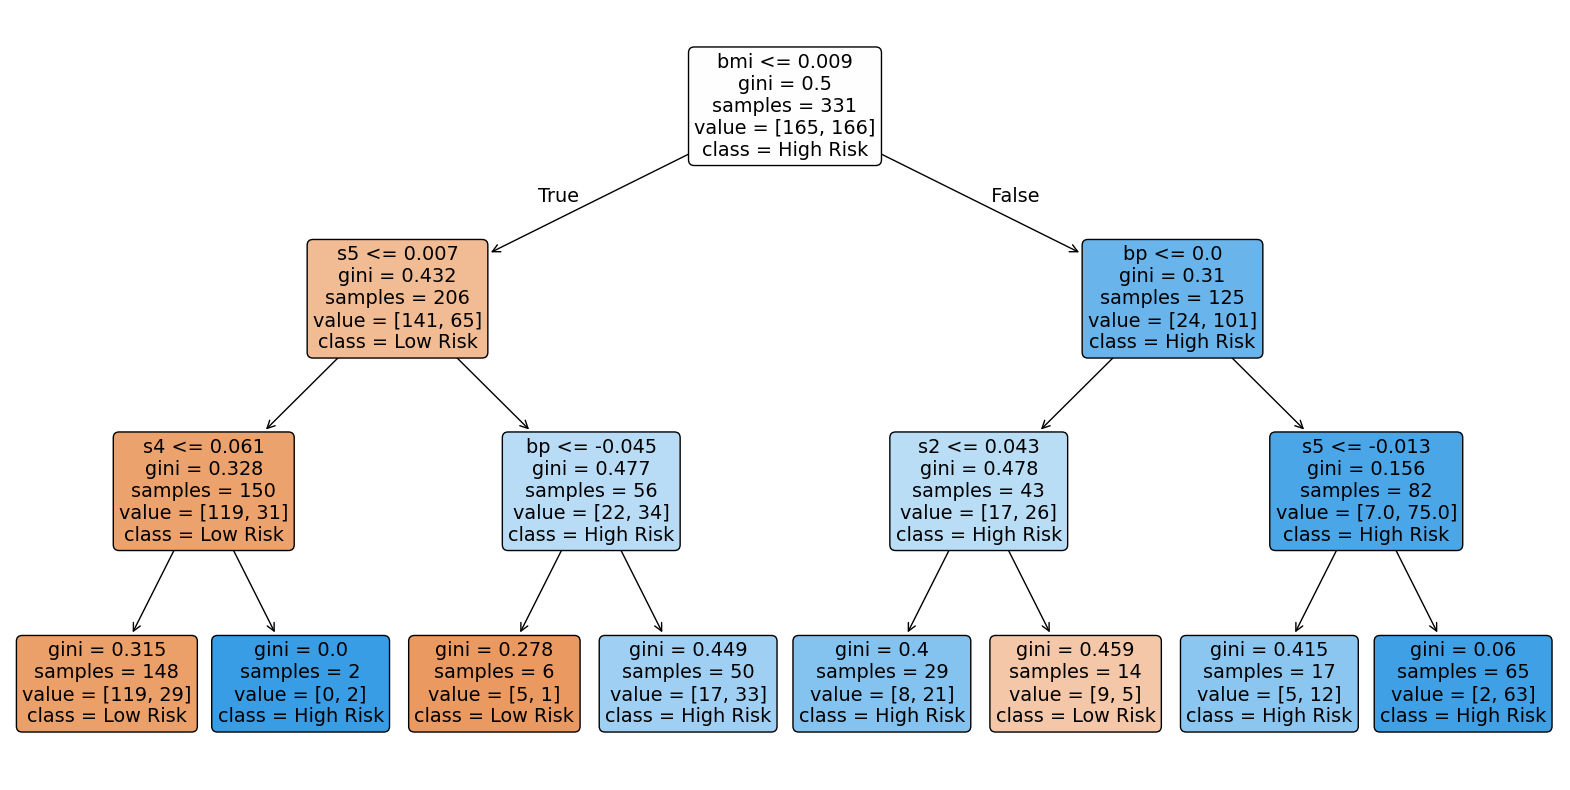

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_viz,
    feature_names=X.columns,
    class_names=["Low Risk", "High Risk"],
    filled=True,
    rounded=True
)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 4, 5, None],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2"]
}


In [ ]:
grid = GridSearchCV(
    estimator=ExtraTreesClassifier(random_state=42),
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)


In [ ]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

In [ ]:
grid.best_params_




{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 200}

In [ ]:
grid.best_score_

np.float64(0.8251120834008535)

In [ ]:
grid.best_estimator_

ExtraTreesClassifier(min_samples_leaf=5, n_estimators=200, random_state=42)